# Data Analysis of 2024 Boston Marathon Data

In [1]:
import pandas as pd
import numpy as np
import pickle

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open('marathon_data_clean.pkl', 'rb') as file:
    df = pickle.load(file)

In [5]:
df['time_net_hr'].mean()

3.8848166125189523

In [7]:
## Average Time by Sex Category
df.groupby('sex')['time_net_hr'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
M,14719.0,3.735661,0.811877,2.104722,3.117083,3.531944,4.206389,7.185000
W,10885.0,4.087303,0.731395,2.376944,3.540278,3.906111,4.522222,6.575278
X,46.0,3.696884,0.723354,2.462500,3.231597,3.570972,4.014583,6.113611


<Axes: xlabel='bib_num', ylabel='time_net_hr'>

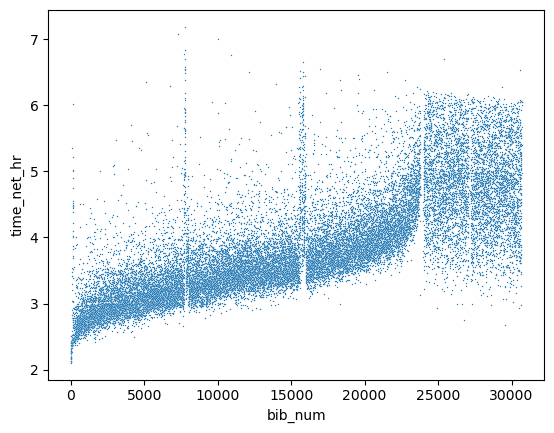

In [8]:
##Bib Number compared to finish time
sns.scatterplot(df,x = 'bib_num', y = 'time_net_hr', s=1)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


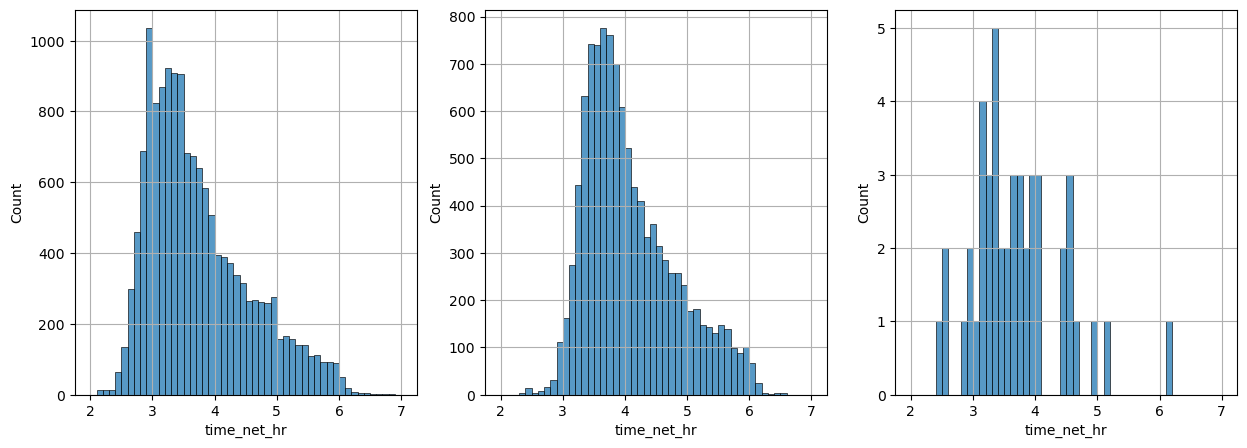

In [9]:
###Histogram of finish times by Sex
bins = np.linspace(2, 7, 51)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[df['sex'] == 'M']['time_net_hr'], ax=axs[0], bins = bins)
sns.histplot(df[df['sex'] == 'W']['time_net_hr'], ax=axs[1], bins = bins)
sns.histplot(df[df['sex'] == 'X']['time_net_hr'], ax=axs[2], bins = bins)

#fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3, 4, figsize = (8,4))
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

## The Whole Hour Effect

#### Do athletes speed up when they believe that they can hit a significant milestone, such as a round finish time. 

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_net_hr', ylabel='Count'>

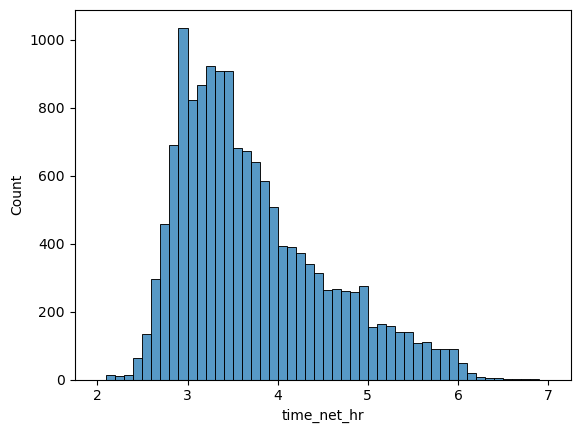

In [15]:
## The following men's histogram show an anomalous spike at 3 hours, 3.5 hours, 4 hours and 5 hours.
bins = np.linspace(2, 7, 51)
sns.histplot(df[df['sex'] == 'M']['time_net_hr'], bins = bins)

In [11]:
df['last2miles_percent'] = (df[['26_2_miles_min_per_mile','40K_min_per_mile']].mean(axis=1) - df['mile_split_min'])/df['mile_split_min']

In [21]:
## What is the distribution of athelete times during hte last mine compared to the overall average
# calculate IQR for column Height
Q1 = df['last2miles_percent'].quantile(0.25)
Q3 = df['last2miles_percent'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 3
outliers = df[(df['last2miles_percent'] < Q1 - threshold * IQR) | (df['last2miles_percent'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df_new = df.drop(outliers.index)
df_new['last2miles_percent'].mean()

0.06072681435319437

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='last2miles_percent', ylabel='Count'>

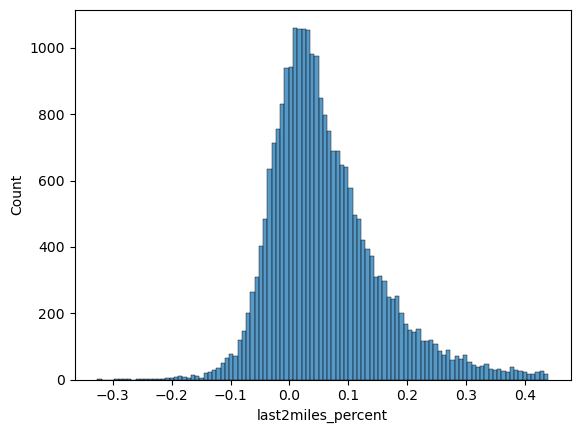

In [23]:
## The last few miles average 0.06 miles per hour slower than the total average. 
sns.histplot(df_new['last2miles_percent'])

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


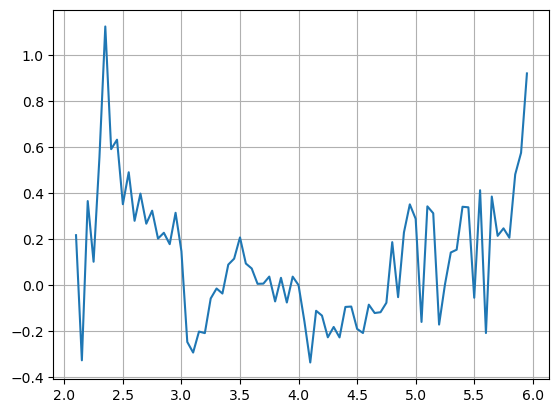

In [85]:
#Does there appear to be a drop in the percent better before and after the significant mile markers. 
diff_perc = []
interval = 0.05
time_list = [x / 100.0 for x in range(200, 600, 5)]

for i in time_list:
    low_time = i-1
    high_time = i+1
    average_perc_better = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time) ]['last2miles_percent'].mean()
    target_perc_better = df_new[(df_new['time_net_hr'] >= i) & (df_new['time_net_hr'] <= i+interval) ]['last2miles_percent'].mean()
    diff_perc.append((average_perc_better-target_perc_better)/average_perc_better)

fig = sns.lineplot(x = time_list, y = diff_perc)
fig.grid(True)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


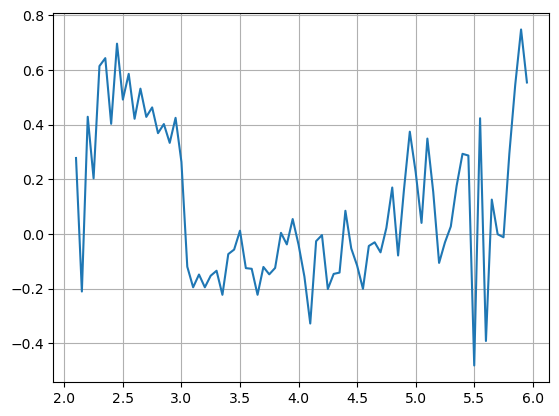

In [94]:
#Is there any difference for men only. 
diff_perc = []
interval = 0.05
time_list = [x / 100.0 for x in range(200, 600, 5)]

for i in time_list:
    low_time = i-1
    high_time = i+1
    average_perc_better = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time ) & (df_new['sex'] == 'M')]['last2miles_percent'].mean()
    target_perc_better = df_new[(df_new['time_net_hr'] >= i) & (df_new['time_net_hr'] <= i+interval) & (df_new['sex'] == 'M')]['last2miles_percent'].mean()
    diff_perc.append((average_perc_better-target_perc_better)/average_perc_better)

fig = sns.lineplot(x = time_list, y = diff_perc)
fig.grid(True)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


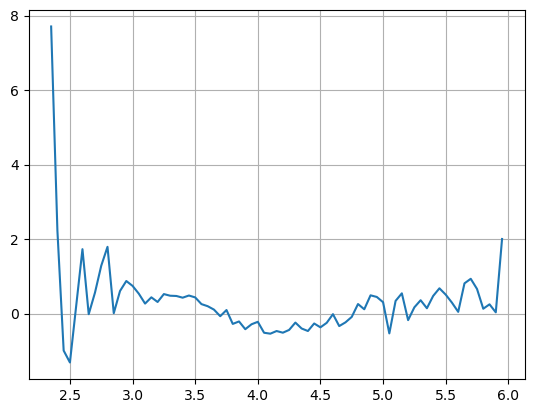

In [93]:
#What does this look like for women only
diff_perc = []
interval = 0.05
time_list = [x / 100.0 for x in range(200, 600, 5)]

for i in time_list:
    low_time = i-1
    high_time = i+1
    average_perc_better = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time ) & (df_new['sex'] == 'W')]['last2miles_percent'].mean()
    target_perc_better = df_new[(df_new['time_net_hr'] >= i) & (df_new['time_net_hr'] <= i+interval) & (df_new['sex'] == 'W')]['last2miles_percent'].mean()
    diff_perc.append((average_perc_better-target_perc_better)/average_perc_better)

fig = sns.lineplot(x = time_list, y = diff_perc)
fig.grid(True)

In [ ]:
## Overall there does seem to be a consistency in women's times that match the histogram of tiem finishes. 
## On the other Hand, men's times do pickup around significant mile markers. 

In [65]:
time_average = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time) ]['last2miles_percent'].mean()
time_target_average = df_new[(df_new['time_net_hr'] >= lowlow_time) & (df_new['time_net_hr'] <= highhigh_time)]['last2miles_percent'].mean()

print("Average Time is :" + str(np.round(time_average*100,decimals=1)))
print("Average Time at target is :" + str(np.round(time_target_average*100,decimals=1)))
print("Percent of percent :" + str(np.round((time_average - time_target_average)*100/time_average,decimals=1)))

Average Time is :6.7
Average Time at target is :6.3
Percent of percent :5.3


In [66]:
time_average = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time) & (df_new['sex'] == 'M') ]['last2miles_percent'].mean()
time_target_average = df_new[(df_new['time_net_hr'] >= lowlow_time) & (df_new['time_net_hr'] <= highhigh_time) & (df_new['sex'] == 'M')]['last2miles_percent'].mean()

print("Average Time is :" + str(np.round(time_average*100,decimals=1)))
print("Average Time at target is :" + str(np.round(time_target_average*100,decimals=1)))
print("Percent of percent :" + str(np.round((time_average - time_target_average)*100/time_average,decimals=1)))

Average Time is :9.7
Average Time at target is :8.6
Percent of percent :11.4


In [67]:
time_average = df_new[(df_new['time_net_hr'] >= low_time) & (df_new['time_net_hr'] <= high_time) & (df_new['sex'] == 'W') ]['last2miles_percent'].mean()
time_target_average = df_new[(df_new['time_net_hr'] >= lowlow_time) & (df_new['time_net_hr'] <= highhigh_time) & (df_new['sex'] == 'W')]['last2miles_percent'].mean()

print("Average Time is :" + str(np.round(time_average*100,decimals=1)))
print("Average Time at target is :" + str(np.round(time_target_average*100,decimals=1)))
print("Percent of percent :" + str(np.round((time_average - time_target_average)*100/time_average,decimals=1)))

Average Time is :4.1
Average Time at target is :4.6
Percent of percent :-10.9


## Negative Split

#### There are many running philosophies. On of those it to create perfect splits during a marathon or negatives splits which means that the runner increased their pace in the second half of the marathon over the first half. 

(4.0, 14.0)

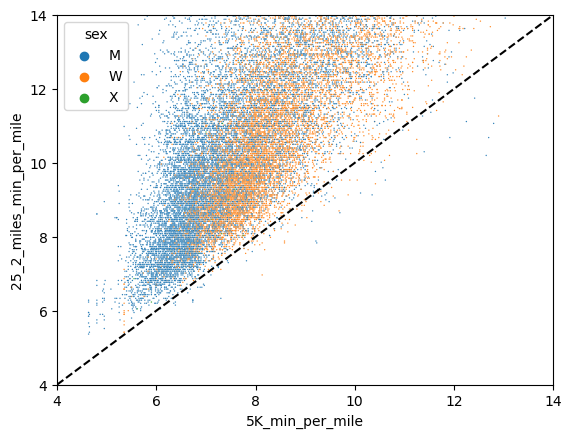

In [37]:
## Almost all runners were going slower in the second to last mile than the first 3 miles. 
ax = sns.scatterplot(df,x = '5K_min_per_mile', y = '25_2_miles_min_per_mile', hue='sex',s=1)
x = np.linspace(4, 14, 100)
ax.plot(x, x, 'k--', label='y=x')
ax.set_ylim(4, 14)
ax.set_xlim(4, 14)

(4.0, 14.0)

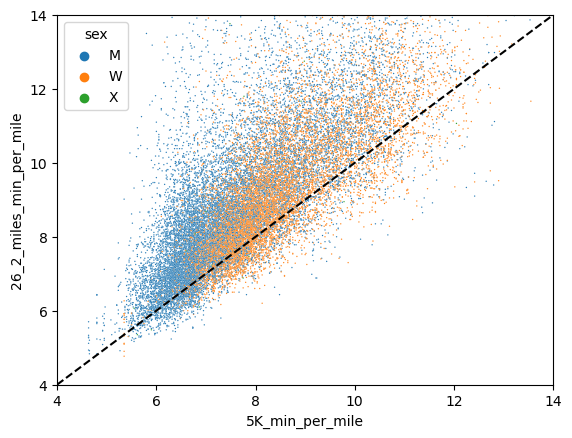

In [85]:
## Many runners picked up speed and were faster in the last mile than in the first 3 miles. 
ax = sns.scatterplot(df,x = '5K_min_per_mile', y = '26_2_miles_min_per_mile', hue='sex',s=1)
x = np.linspace(4, 14, 100)
ax.plot(x, x, 'k--', label='y=x')
ax.set_ylim(4, 14)
ax.set_xlim(4, 14)

In [95]:
df['time_second_half'] = df['26_2_miles_time'] - df['HALF_time']

(50.0, 200.0)

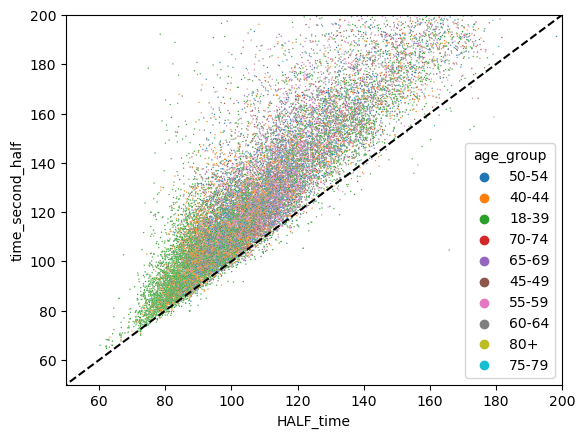

In [100]:
#There does not seem ot be any discrepancy by age range, however we do see that the slower marathon runners 
# typically ran slower in the second half than in the first half of the marathon. 
ax = sns.scatterplot(df,x = 'HALF_time', y = 'time_second_half',s=1,hue='age_group')
x = np.linspace(4, 200, 100)
ax.plot(x, x, 'k--', label='y=x')
ax.set_ylim(50, 200)
ax.set_xlim(50, 200)

#### Overall it is uncommon for runners to be faster in the second hald of the marathon than in the first half. 

In [46]:
pd.set_option('display.max_columns', None)
grouped = df.groupby('state')['time_net_hr'].describe(include='all')
grouped.where(grouped['count'] >50).sort_values(by=['mean'], ascending = Tr)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
DC,117.0,3.524767,0.633676,2.508889,3.015278,3.471111,3.869722,5.476111
IN,211.0,3.561964,0.608966,2.434167,3.128472,3.458056,3.840278,6.008611
CO,494.0,3.563341,0.643820,2.208889,3.102500,3.464444,3.891597,6.031389
MN,301.0,3.581297,0.621171,2.453889,3.159167,3.475556,3.895556,5.906389
QC,415.0,3.591677,0.507923,2.462500,3.242639,3.552222,3.880278,5.389167
...,...,...,...,...,...,...,...,...
VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
distance_dict = {'5K': 3.11, '10K': 6.21, '15K':9.32 , '20K':12.43 , 'HALF': 13.1, '25K': 15.53, '30K': 18.64, '20_miles': 20,
                 '21_miles': 21, '35K': 21.75, '23_miles': 23, '24_miles': 24, '40K': 24.85, '25_2': 25.2, '26_2':26.2}

In [141]:
#Convert object type to int type for place_total
marathon_data['place_total'] = marathon_data['place_total'].astype('int32', errors = 'ignore')



<div style=style="font-si40: 12
   EXPLORING THE DATA here

</div>

In [34]:
###Graphics

<Axes: xlabel='place_ac', ylabel='time_net_hr'>

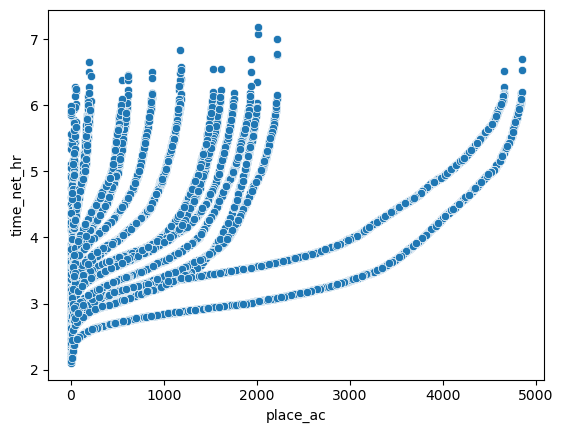

In [196]:
sns.scatterplot(df,x = 'place_ac',y = 'time_net_hr')

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


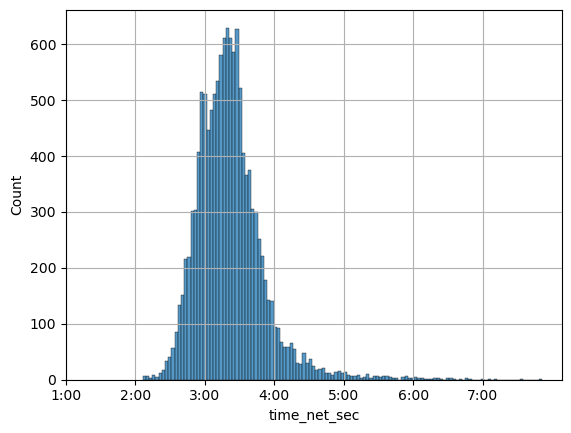

In [138]:
fig = sns.histplot(marathon_data[marathon_data['bib_num']<=15722]['time_net_sec'])
fig.set_xticks([1,2,3,4,5,6,7],['1:00','2:00','3:00','4:00','5:00','6:00','7:00'])
fig.grid(True)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


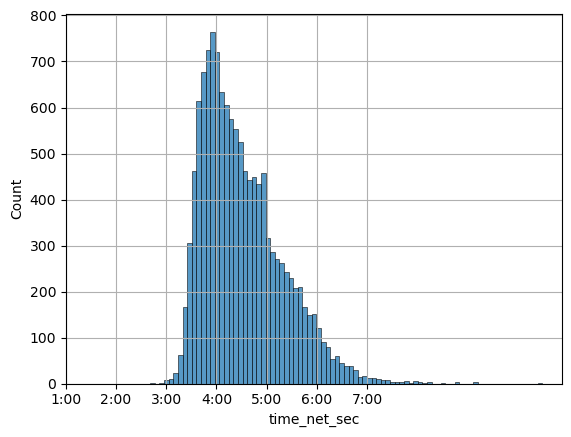

In [139]:
fig = sns.histplot(marathon_data[marathon_data['bib_num']>15722]['time_net_sec'])
fig.set_xticks([1,2,3,4,5,6,7],['1:00','2:00','3:00','4:00','5:00','6:00','7:00'])
fig.grid(True)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


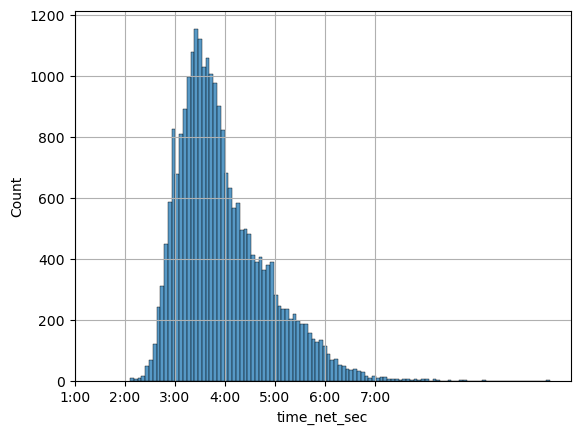

In [110]:
fig = sns.histplot(marathon_data[marathon_data['team'].isna()]['time_net_sec'])
fig.set_xticks([3600,7200,10800,14400,18000,21600,25200],['1:00','2:00','3:00','4:00','5:00','6:00','7:00'])
fig.grid(True)

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

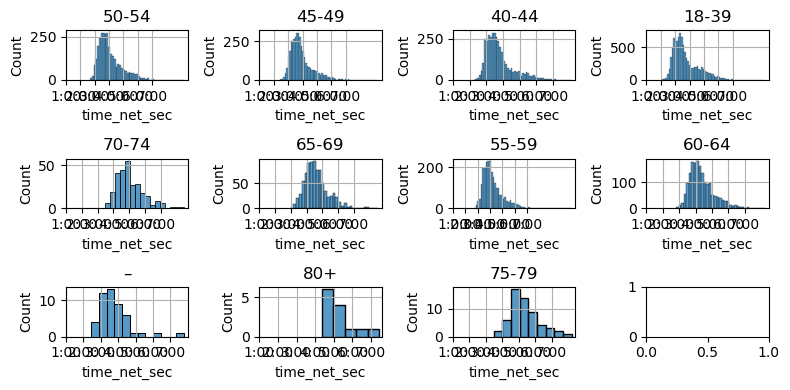

In [82]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3, 4, figsize = (8,4))
age_list = marathon_data['age_group'].unique()
fig_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
for i in range(len(age_list)):
    sns.histplot(marathon_data[marathon_data['age_group'] == age_list[i]]['time_net_sec'], ax=fig_list[i])
    fig_list[i].set_xticks([3600,7200,10800,14400,18000,21600,25200],['1:00','2:00','3:00','4:00','5:00','6:00','7:00'])
    fig_list[i].grid(True)
    fig_list[i].title.set_text(age_list[i])
fig.tight_layout()

C:\Users\jorly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


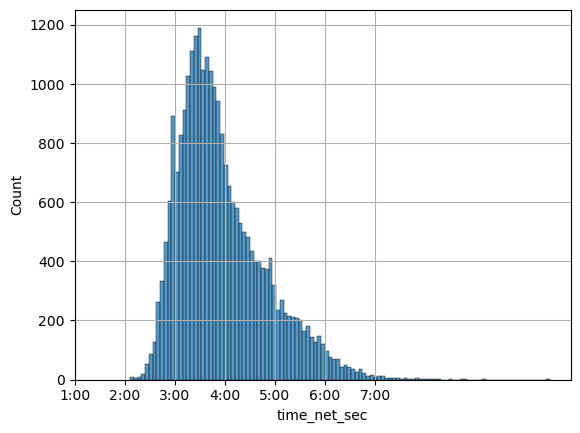

In [63]:
axes = sns.histplot(marathon_data['time_net_sec'])
axes.set_xticks([3600,7200,10800,14400,18000,21600,25200],['1:00','2:00','3:00','4:00','5:00','6:00','7:00'])
axes.grid(True)
